Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


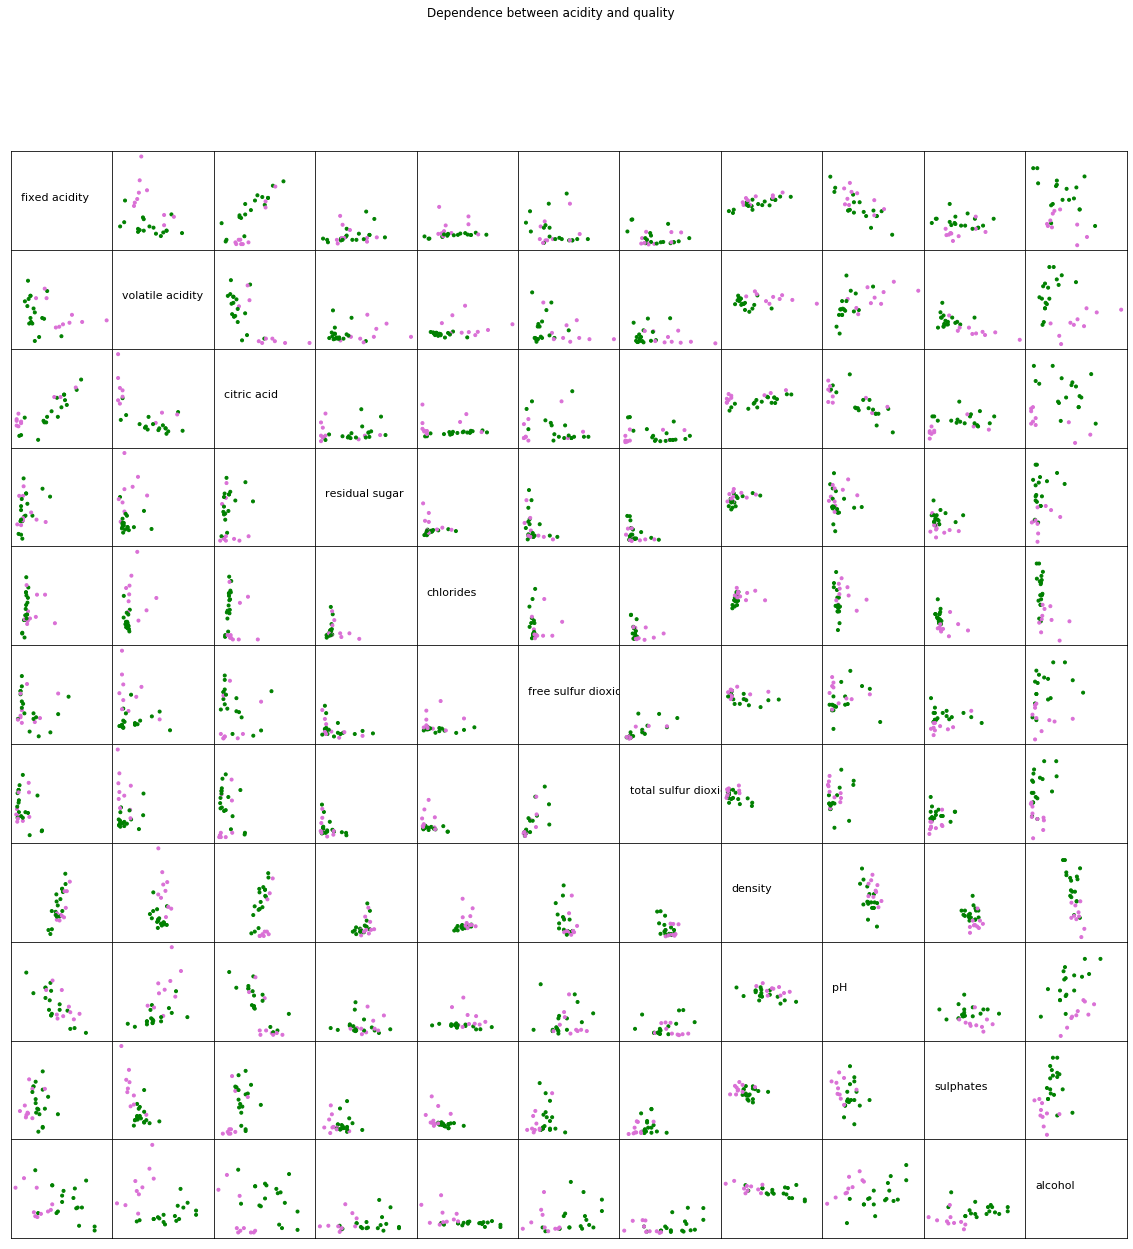

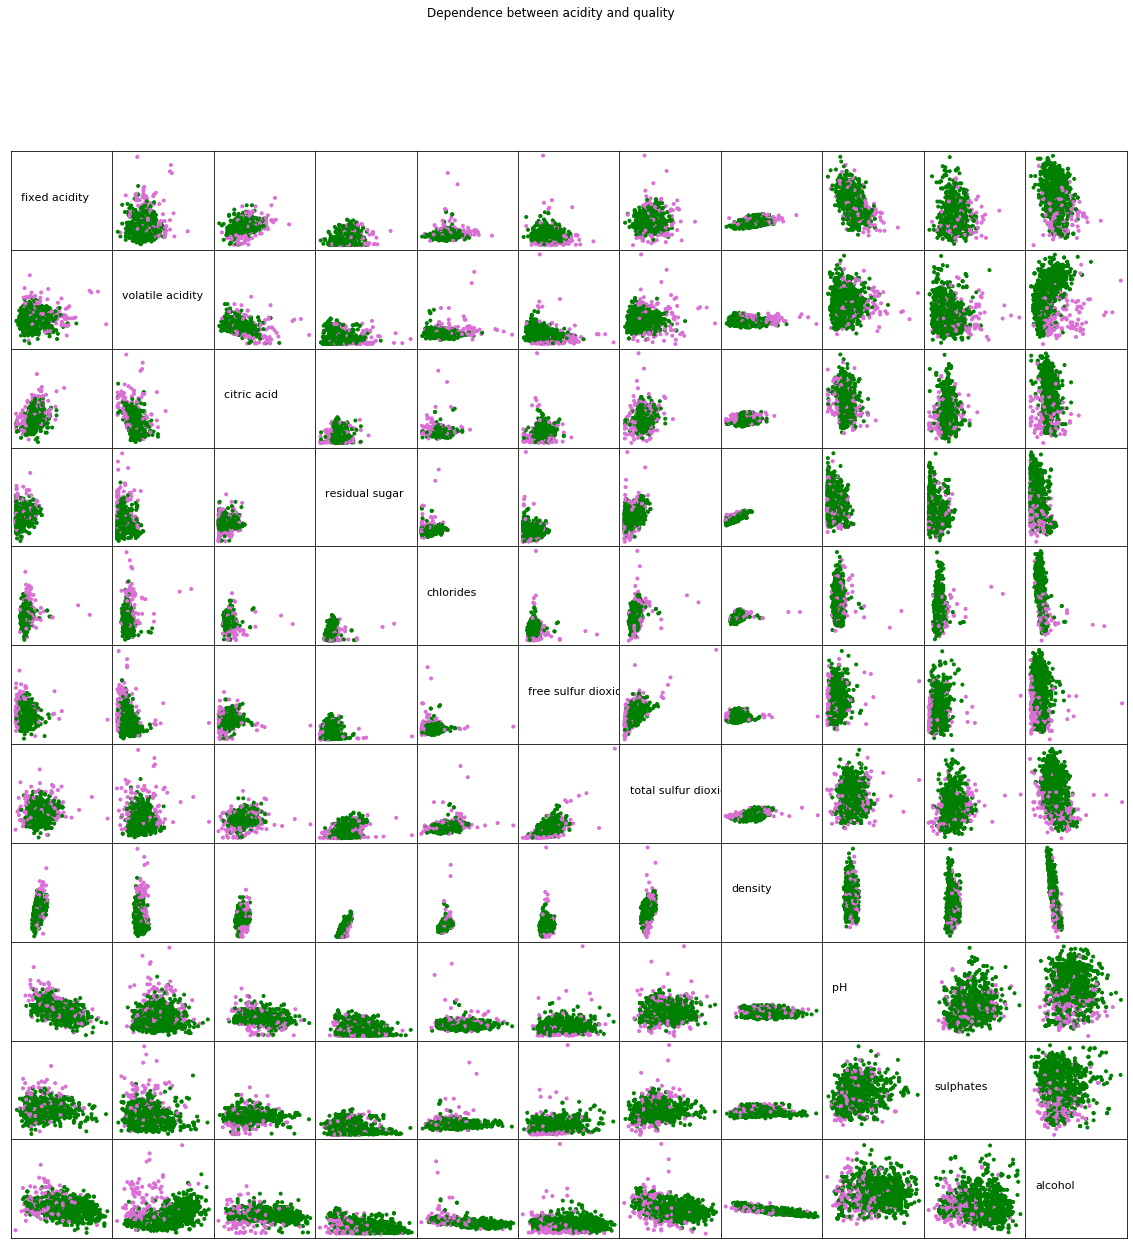

In [3]:
#V.1

from matplotlib import pyplot as plt
import pandas as pd

# You are allowed to import and use the matplotlib, pandas, and the standard python libraries for this project.
# ◦ You are NOT allowed to use pandas DataFrame math/matrix methods (i.e.
# ‘.T’, ‘.transpose’, ‘.dot’, ‘.add’, ‘.divide’, ‘.mean’, ‘.std’, etc. . . )
# • You are NOT allowed to directly import and use libraries like: numpy, scipy, scikitlearn, tensorflow, etc


white_df = pd.read_csv("resources/winequality-white.csv", sep=";")
red_df = pd.read_csv("resources/winequality-red.csv", sep=";") 
print(red_df.columns)


def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    assert good_threshold > bad_threshold, "Please, enter good_treshold sctrictly > than bad_treshold"
    q = wine_data['quality']    

    labels = wine_data.columns[:-1]
    f, axarr = plt.subplots(wine_data.shape[1]-1, wine_data.shape[1]-1, figsize=(20, 20))
    f.suptitle('Dependence between acidity and quality')
    f.subplots_adjust(wspace=0, hspace=0)

    k = 0
    for x in [wine_data[label] for label in labels]:
        j = 0
        for y in [wine_data[label] for label in labels]:
            axarr[k][j].set_xticks([])
            axarr[k][j].set_yticks([])
            if k == j:
                axarr[k][j].text(0.1, 0.5, labels[k], fontsize=11)
            else:
                colors = [('orchid' if q[i]<= bad_threshold else ('green' if q[i]>=good_threshold else 'None'))\
                          for i in range(wine_data.shape[0])]
                axarr[k][j].scatter(x, y, marker='.', c=colors)
            j+=1
        k+=1
    plt.savefig('fig.png') if save_plot else _

        
    
plot_scatter_matrix(red_df, 8, 3, True)
plot_scatter_matrix(white_df, 7, 4)


# Important chemical factors: volatile acidity, sulfates, alcohol. 
# Basically we can divide almost strictly bad and good wines considering them.

In [ ]:
# V.2
#             import pdb; pdb.set_trace()

import random
random.seed(777)


def dot(a: list, b: list) -> float:
    return sum([a[i] * b[i] for i in range(len(a))])

class Perceptron(object):

    def __init__(self, threshold, learning_rate =0.01, epochs=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.res = []
        self.current_epoch = 0
        self.threshold = threshold

    def error(self, y: list, d: list) -> int:
        return sum(abs(d-y))

    def do_step(self, x, y, d):
        for row in range(len(x)):
            y[row] = int(dot(x[row], self.w) >= self.threshold)
            for col in range(len(x[row])):
                self.w[col] += self.learning_rate * (d[row] - y[row]) * x[row][col]
        self.current_epoch +=1
#         print(f'epoch = {self.current_epoch}, error = {self.res[-1][1]}')
        self.res.append([self.current_epoch, self.error(y, d), self.w, y])
          
    def train(self, x: list, d: list):  # x - matrix, row - one specific wine, columns - factors
        assert (len(x) == len(d)), "x should have the same amount of rows as d"
        
        self.w = [random.random() for i in range(len(x[0]))]
        y = [random.random() for _ in range(len(x))]
        self.res.append([self.current_epoch, self.error(y, d), self.w, y])
        if self.epochs > 0:
            for _ in range(self.epochs):
                self.do_step(x, y, d)
        else:
            while self.res[-1][1] > 0:
                self.do_step(x, y, d)


            
learning_rate = 0.1
threshold = 7
perceptron = Perceptron(threshold, learning_rate, 0)

thresh_wines = [3, 8]
factors = ['pH', 'alcohol']

part = red_df[red_df.quality.isin(thresh_wines)] # to chose wines with very different quality
part.index = range(len(part))
x = part[factors].values
d = (part['quality'] >= threshold).astype(int)
perceptron.train(x, d)




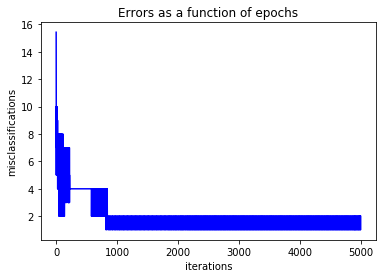

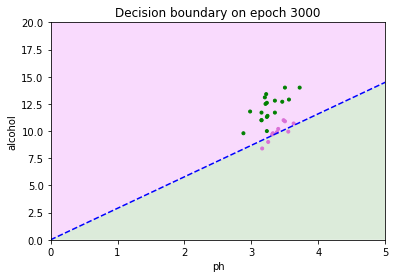

In [66]:
def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    """
    Plot the performance of our perceptron or adaline.
    this function will produce a two plot figure:
    1) Classification Errors vs. Epochs
    2) Decision boundary for two factors
    """
    plt.figure(1)
    errors = [perceptron.res[i][1]  for i in range(len(perceptron.res))]
    epochs = [perceptron.res[i][0]  for i in range(len(perceptron.res))]
    plt.plot(epochs, errors, c='b')
    plt.xlabel('iterations')
    plt.ylabel('misclassifications')
    plt.title('Errors as a function of epochs')
    plt.show()
    
    w1 = performance[epoch][2][0]
    w2 = performance[epoch][2][1]
    f1 = [i for i in range(15)] # ph
    f2 = [- w1 * f1[j] / w2 for j in range(len(f1))] # ph * w1 + alcohol *w2 = 0
    plt.figure(2)
    plt.plot(f1, f2, linestyle='--', color='b')
    plt.fill_between(f1, f2, 0, facecolor=(0.862, 0.921, 0.854))
    plt.fill_between(f1, f2, 100, facecolor=(0.976, 0.854, 0.992))
    
    x = wine_data['pH'].values
    y = wine_data['alcohol'].values
    q = wine_data['quality']
    colors = [('orchid' if q[i]<= bad_thresh else ('green' if q[i]>=good_thresh else 'None'))\
                          for i in range(len(wine_data))]
    plt.scatter(x, y, marker='.', c=colors)
    
    plt.title(f'Decision boundary on epoch {epoch}')
    plt.xlabel('ph') # factor 1
    plt.ylabel('alcohol') # factor 2
    plt.xlim(0, 5)
    plt.ylim(0, 20)
    
    
#     for x in [wine_data[label] for label in labels]:
# colors = [('orchid' if q[i]<= bad_threshold else ('green' if q[i]>=good_threshold else 'None'))\
#                           for i in range(wine_data.shape[0])]
#                 axarr[k][j].scatter(x, y, marker='.', c=colors)

plot_performance(perceptron.res, part, thresh_wines[1], thresh_wines[0], perceptron.current_epoch)